# Handwritten classification using ANN

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
# Normalize the pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
# Define the ANN model architecture
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),  # Convert the 28x28 image into a 784-dimensional vector (image flattening)
  keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 units and ReLU activation
  keras.layers.Dense(10, activation='softmax')  # Output layer with 10 units and softmax activation for multiclass classification
])

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Train the model on the training set for 5 epochs
history=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0366 - accuracy: 0.9882 - val_loss: 0.0776 - val_accuracy: 0.9774
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0284 - accuracy: 0.9913 - val_loss: 0.0852 - val_accuracy: 0.9761
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0243 - accuracy: 0.9924 - val_loss: 0.0755 - val_accuracy: 0.9787
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0198 - accuracy: 0.9938 - val_loss: 0.0765 - val_accuracy: 0.9778
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0149 - accuracy: 0.9959 - val_loss: 0.0766 - val_accuracy: 0.9794


In [17]:
# Predict the labels of the test set
import numpy as np
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)


313/313 [==============================] - 1s 2ms/step


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
# Print the confusion matrix
print('Confusion Matrix:')
print(cm)
# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)

# Print the accuracy
print('Accuracy:', acc)

Confusion Matrix:
[[ 969    0    1    1    1    1    4    1    1    1]
 [   0 1125    4    0    0    2    2    0    2    0]
 [   1    1 1016    1    1    0    2    5    4    1]
 [   0    0    5  986    0    9    0    3    2    5]
 [   0    0    4    0  966    0    4    0    0    8]
 [   2    0    0    5    3  880    1    0    1    0]
 [   2    3    1    1    4    4  943    0    0    0]
 [   1    2   10    4    5    0    0  992    1   13]
 [   2    1   10    4    4   10    4    2  929    8]
 [   0    4    0    2    9    5    0    0    1  988]]
Accuracy: 0.9794


# Plotting 

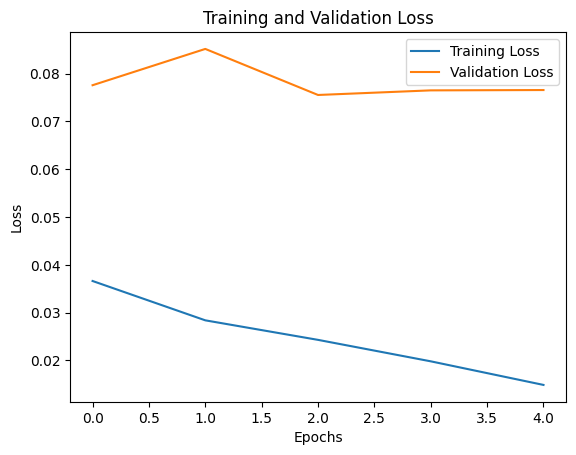

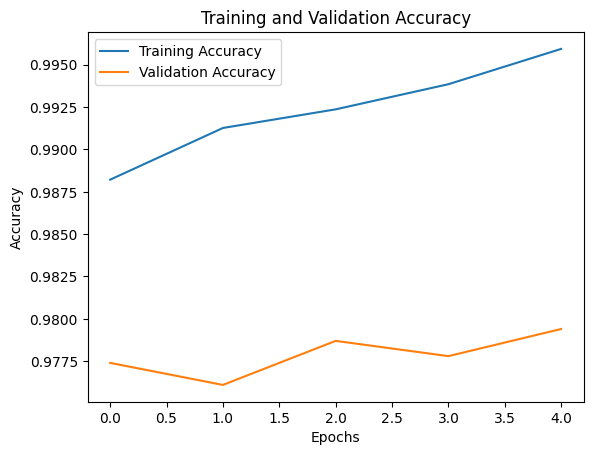

In [19]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



# Handwritten digit classification using CNN

In [20]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [21]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [22]:
# Normalize the pixel values between 0 and 1 and add a channel dimension to the images
x_train = x_train.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = x_test.astype('float32') / 255.0
x_test = np.expand_dims(x_test, axis=-1)

In [23]:
# Define the CNN model architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [24]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
# Train the model on the training set for 5 epochs and validate on the test set
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1280 - accuracy: 0.9614 - val_loss: 0.0412 - val_accuracy: 0.9864
Epoch 2/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0422 - accuracy: 0.9872 - val_loss: 0.0359 - val_accuracy: 0.9874
Epoch 3/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0294 - accuracy: 0.9909 - val_loss: 0.0392 - val_accuracy: 0.9873
Epoch 4/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0203 - accuracy: 0.9936 - val_loss: 0.0347 - val_accuracy: 0.9892
Epoch 5/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0157 - accuracy: 0.9949 - val_loss: 0.0320 - val_accuracy: 0.9898


In [26]:
# Predict the labels of the test set
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 2s 5ms/step


In [27]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print('Confusion Matrix:')
print(cm)

# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)

# Print the accuracy
print('Accuracy:', acc)

Confusion Matrix:
[[ 975    1    1    0    0    0    1    1    0    1]
 [   0 1132    0    2    0    0    0    0    0    1]
 [   1    0 1023    2    4    0    0    2    0    0]
 [   1    0    0 1007    0    2    0    0    0    0]
 [   0    1    0    0  978    0    0    0    0    3]
 [   1    0    0    8    0  882    1    0    0    0]
 [   4    2    0    0    5    4  943    0    0    0]
 [   0    4    4    1    0    0    0 1016    1    2]
 [   4    1    1    2    0    1    2    0  961    2]
 [   1    2    0    5    6    6    0    1    7  981]]
Accuracy: 0.9898


# Plotting 

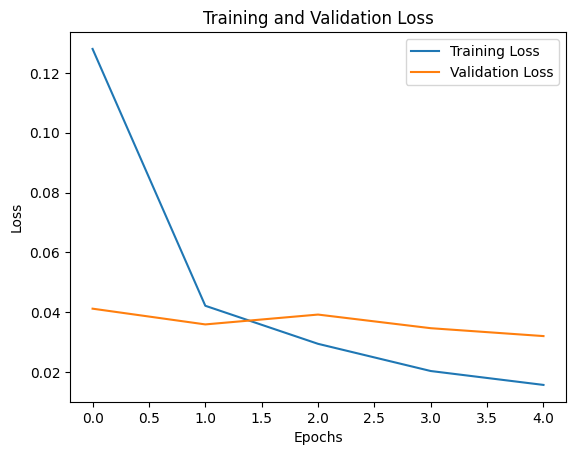

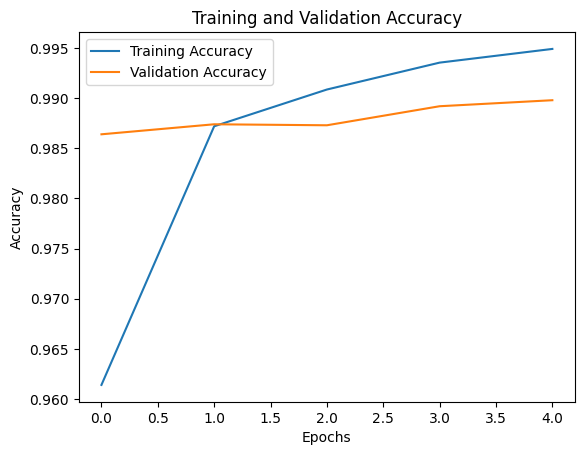

In [28]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()